# Word Embedding
> "NLP"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 이강철
- categories: [python]
- hide :false
- published: true

# WordEmbedding

`1`. 차원의 저주(Curse of Dimensionality) : 수학적 공간 차원(=변수 개수)이 늘어나면서, 문제 계산법이 지수적으로 커지는 상황

만약 $x=[1,2,3,4,5],\, y= [0,0,0,0,0]\to (X,Y)$ 을 표현한다고 하자

아래와 같이 1차원 상에서 표현되는 정보를 2차원 상에서 표현하게되어 설명 공간이 $5^2 =25$가 된 것이다.

이러한 경우를 차원의 저주라고 하며 이는 모델링 과정에서 저장 공간과 처리 시간이 불필요하게 증가됨을 의미한다.

In [ ]:
#collapse-hide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

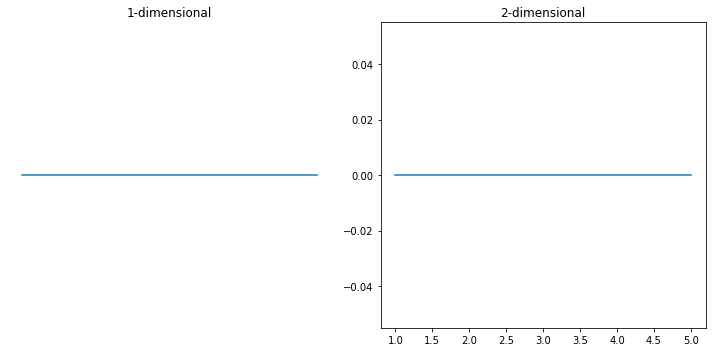

In [ ]:
#collapse-hide
fig, axes = plt.subplots(1,2, figsize=(10,5))

ax1, ax2 =axes

x = [1,2,3,4,5]
y = [0,0,0,0,0]
ax1.plot(x,y)
ax1.set_title("1-dimensional")
ax1.axis("off")
ax2.plot(x,y)
ax2.set_title("2-dimensional")
fig.tight_layout()

이러한 문제점을 해결하기 위해 NLP 분야에서는 단어를 저차원에 표현하기 위한 **"워드 임베딩(Word Embedding)"**을 제안하였다.

기존의 통계적인 방법이 단어의 출현 빈도에 집중 한다면 워드 임베딩은 서로 유사한 단어들 간 유사성을 포착하는데 집중한다.

`-` 가정 : 유사한 의미를 가진 단어는 유사한 문맥안에서 발견된다.

`-` 가정의 해석 : 유사한 의미를 가진 단어들은 유사한 단어 벡터를 가진다. 

`-` 이점 : 이웃된 단어들의 단어 벡터들을 학습하여 단어간 유사성을 도출해낼 수 있다. 

> example 1 : 'man' + 'royal' = 'king'

## Word2Vec

* 워드 "**Word2Vec**" 중 가장 대표적인 방법으로 **"CBOW"**, **"skip-gram"** 이 존재한다.

### CBOW (Continuous Bag of Words)

* 주변 단어를 이용하여 중심단어를 예측한다.

* 주어진 단어집합에서 window size $k$ 를 지정해 target word  주변 $k$개의 단어들을 이용하여 조건부 확률을 계산한다.

* `프라닭` 이라는 단어를 예측한다고 가정한다.

`문장1`: 금요일 밤에 `프라닭`은 못참지

`문장2`: 불금인데 교촌치킨 에 맥주?

`단어` : [ "금요일", "밤", "프라닭","불금", "교촌치킨", "맥주" ] $\to Word \in R^{6 \times 6}$

* 문장의 개수는 $j=2$, 단어의 개수는 총 $i=6$, 축소할 임베딩 차원의 개수는 $n=3$ 으로 설정하자.

* 차원축소를 위해 생성되는 임베딩(=가중치) 행렬 $W \in R^{6\times 3}$ 으로 파이토치 기준 $N(0,1)$에서 생성된다.

* 목적 1 : $Word \in R^{6 \times 6} \to W \in R^{6\times 3}$

*  목적 2 : 단어간 의미적 유사성을 포착하기 위한 임베딩 행렬 갱신 $W^{t} \to W^{t+1} $

`1`. one-hot vector $Word \in R^{6 \times 6}$ 생성

In [ ]:
#collapse-hide
import numpy as np
import pandas as pd

index = [ "금요일", "밤", "프라닭","불금", "교촌치킨", "맥주" ]

word1 = [1,0,0,0,0,0]
word2 = [0,1,0,0,0,0]
word3 = [0,0,1,0,0,0]
word4 = [0,0,0,1,0,0]
word5 = [0,0,0,0,1,0]
word6 = [0,0,0,0,0,1]

one_hot = pd.DataFrame([word1,word2,word3,word4,word5,word6],index=index)
one_hot

,0,1,2,3,4,5
금요일,1,0,0,0,0,0
밤,0,1,0,0,0,0
프라닭,0,0,1,0,0,0
불금,0,0,0,1,0,0
교촌치킨,0,0,0,0,1,0
맥주,0,0,0,0,0,1


`2`. 임베딩(가중치) 행렬 생성 $W \in R^{6\times 3}$

In [ ]:
#collapse-hide
W = np.random.normal(loc = 0, scale=1,size=18).reshape(6,3)
W = pd.DataFrame(W,index=index, columns = ["W1","W2","W3"])
W

,W1,W2,W3
금요일,-0.946677,-0.964799,-2.236172
밤,1.481341,0.678401,-1.239748
프라닭,-0.855941,0.556102,0.330505
불금,0.316146,-1.791996,-0.307091
교촌치킨,1.289018,-1.415381,0.418707
맥주,1.106920,0.051748,0.478479


`3`. $\widehat W_{프라닭} = \frac {W_{밤} + W_{불금}} {2}   = [0.89,-0.55,0.77]$

In [ ]:
#collapse-hide
W_1 = list((W.loc["밤"] + W.loc["불금"])/2)
W_1

[0.8987433793584608, -0.5567973759616802, -0.7734197905021276]

`4`.  $ Z = \widehat W_{프라닭} \times  W^T = $ [ 1.42,  1.91, -1.33,  1.52,  1.62,  0.6 ]

In [ ]:
#collapse-hide
z = np.dot(np.array(W_1),W.T.to_numpy())
z.round(2)

array([ 1.42,  1.91, -1.33,  1.52,  1.62,  0.6 ])

`5`. $\hat y$ 계산

$\hat y=softmax(Z) = [0.18,\,\,0.30,\,\,0.01,\,\,0.20,\,\,0.22,\,\,0.08]$

In [ ]:
#collapse-hide
from scipy.special import softmax
y=[0,0,1,0,0,0]
so = pd.DataFrame({"y_hat": softmax(z), "y" : y},index=index)
so

,y_hat,y
금요일,0.182270,0
밤,0.299486,0
프라닭,0.011647,1
불금,0.202155,0
교촌치킨,0.224158,0
맥주,0.080284,0


####  가중치  행렬 갱신

위와 같은 과정을 모든 단어에 대해 수행하여 크로스 엔트로피 함수를 적용한 $loss$를 계산한다.

`1`.   $loss=-\sum_{i=1}^6 y_i\log  p_i$

`2`.$loss$를 최소화 하는 최적의 파라미터 $\theta$를 구함 $\to \theta=\frac {\partial loss}{\partial p} $

`3`. example $W_{밤},W_{불금}$ 업데이트($\alpha $ :  learning rate)

$W_{밤}^{t+1} = W_{밤}^t + \left(\,\alpha\,\times \theta\,\right)$

$W_{불금}^{t+1} = W_{불금}^t + \left(\,\alpha\,\times \theta\,\right)$

#### Summary

* 중심단어 벡터 $W_c$가 있고, 주변 단어 벡터 $W_o$가 있다고 하자.

* $t+1$ 시점에서 $t$ 시점의 결과를 반영하여 단어벡터 $W_{o}$를 갱신한다.

* $W^{t+1}_{o}  =W^{t}_{o} + \alpha \times [l(\theta_{c})]$

* 타겟단어 예측시 사용되는 수식 [4]

$$P(w_O|w_I) = \frac{\exp\,({v^{\prime}_{w_O}}^Tv_{w_{I}})} {\sum_{w=1}^W \exp\,({v^{\prime}_w}^Tv_{w_{I}}) } $$

$$I \,\,:\,\,Input,\,\,O\,\,:\,\, Output$$

$$W : number\,\,\, of\,\,\, Word$$

### Skip-gram

* Skip-gram의 경우 CBOW와 달리 중심단어를 가지고 주변단어를 예측하는 과정이다.

* 따라서 CBOW의 `3`번째 단계 window-size내의 주변 단어들의 합을 평균 내는 과정이 생략된다.